In [1]:
pip install pycaret-ts-alpha

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 468 kB 5.3 MB/s 
     |████████████████████████████████| 1.4 MB 36.5 MB/s 
     |████████████████████████████████| 6.5 MB 18.4 MB/s 
     |████████████████████████████████| 11.2 MB 39.1 MB/s 
     |████████████████████████████████| 2.0 MB 20.0 MB/s 
     |████████████████████████████████| 69 kB 6.2 MB/s 
     |████████████████████████████████| 38.1 MB 1.6 MB/s 
     |████████████████████████████████| 303 kB 50.2 MB/s 
     |████████████████████████████████| 3.3 MB 36.9 MB/s 
     |████████████████████████████████| 43 kB 2.3 MB/s 
     |████████████████████████████████| 79.9 MB 86 kB/s 
     |████████████████████████████████| 9.8 MB 45.0 MB/s 
     |████████████████████████████████| 120 kB 20.1 MB/s 
     |████████████████████████████████| 930 kB 51.0 MB/s 
     |████████████████████████████████| 34.5 MB 1.1 MB/s 
  Created wheel for pyod: filename=p

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings("ignore")

# Importar todos as bases de dados (banco de dados de 2021 atualizado e 2022 até fevereiro)

df_list = []
data = []
anos_list = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
index_inicial = anos_list[0]
index_contador = 0

for x in range(len(anos_list)):
  concatenate_index = str(anos_list[0] + x)
  globals()['df%s' % concatenate_index] = pd.DataFrame(data)

  csv_string = "/content/drive/My Drive/acidentes/por_ocorrencia/datatran" + str(index_inicial) + ".csv"
  index_inicial = index_inicial + 1
  df_list.append(pd.read_csv(csv_string, sep=";", encoding="latin-1"))
  
for df in df_list:
 locals()["df"+str(anos_list[0] + index_contador)] = df
 locals()["df"+str(anos_list[0] + index_contador)]["data_inversa"] = pd.to_datetime(locals()["df"+str(anos_list[0] + index_contador)]["data_inversa"])
 locals()["df"+str(anos_list[0] + index_contador)] = locals()["df"+str(anos_list[0] + index_contador)].sort_values(by=['data_inversa'])
 index_contador = index_contador + 1

Mounted at /content/drive


In [3]:
quantidade_removida = "Foram removidas "
anos_duplicados = []

for i in range(len(anos_list)):
  tamanho_inicial = len(locals()["df"+str(anos_list[i])].index)
  print("Qtd corrências",str(anos_list[i])+":",tamanho_inicial)

# Remover dados com o ID duplicado (Não faz sentido um banco de dados por ocorrência possuir o mesmo id)
  if locals()["df"+str(anos_list[i])]["id"].duplicated().any():
    locals()["df"+str(anos_list[i])].drop_duplicates(subset=["id"], inplace=True)
    quantidade_removida = quantidade_removida + str(tamanho_inicial-len(locals()["df"+str(anos_list[i])].index)) + " ocorrências em " + str(anos_list[i]) + ", "
  print("Qtd ocorrências ajustada",str(anos_list[i])+":",len(locals()["df"+str(anos_list[i])].index))
  print("Dados duplicados removidos em",str(anos_list[i])+":",tamanho_inicial-len(locals()["df"+str(anos_list[i])].index))

print(quantidade_removida)

Qtd corrências 2007: 127675
Qtd ocorrências ajustada 2007: 127671
Dados duplicados removidos em 2007: 4
Qtd corrências 2008: 141043
Qtd ocorrências ajustada 2008: 141038
Dados duplicados removidos em 2008: 5
Qtd corrências 2009: 158646
Qtd ocorrências ajustada 2009: 158646
Dados duplicados removidos em 2009: 0
Qtd corrências 2010: 183469
Qtd ocorrências ajustada 2010: 183465
Dados duplicados removidos em 2010: 4
Qtd corrências 2011: 192326
Qtd ocorrências ajustada 2011: 192322
Dados duplicados removidos em 2011: 4
Qtd corrências 2012: 184568
Qtd ocorrências ajustada 2012: 184561
Dados duplicados removidos em 2012: 7
Qtd corrências 2013: 186748
Qtd ocorrências ajustada 2013: 186745
Dados duplicados removidos em 2013: 3
Qtd corrências 2014: 169201
Qtd ocorrências ajustada 2014: 169197
Dados duplicados removidos em 2014: 4
Qtd corrências 2015: 122161
Qtd ocorrências ajustada 2015: 122158
Dados duplicados removidos em 2015: 3
Qtd corrências 2016: 96363
Qtd ocorrências ajustada 2016: 96362


In [4]:
# Quantidade de Acidentes por dia a cada Ano (banco de dados de 2021 atualizado e 2022 até fevereiro)

auxilio_exec = anos_list[0] + len(anos_list) - 1          # Necessário para poder executar o código sem que plataforma reclame de variável não criada

for x in range(len(anos_list)):
  concatenate_index = str(anos_list[0] + x)
  globals()['dfAcidentes%s' % concatenate_index] = pd.DataFrame(data)

  locals()["dfAcidentes"+str(anos_list[0] + x)] = locals()["df"+str(anos_list[0] + x)]['data_inversa'].value_counts()
  locals()["dfAcidentes"+str(anos_list[0] + x)] = locals()["dfAcidentes"+str(anos_list[0] + x)].to_frame()
  locals()["dfAcidentes"+str(anos_list[0] + x)] = locals()["dfAcidentes"+str(anos_list[0] + x)].sort_index()
  if anos_list[0] + x >= anos_list[1]:
    locals()["dfAcidentes"+str(anos_list[0] + x)] = locals()["dfAcidentes"+str(anos_list[0] + x)].append(locals()["dfAcidentes"+str(anos_list[0] + x - 1)])
  elif x == len(anos_list):
    locals()["dfAcidentes"+str(anos_list[0] + x)] = locals()["dfAcidentes"+str(anos_list[0] + x)].dropna()

locals()['dfAcidentes%s' % auxilio_exec]        # Em nosso caso específico, essa variável também pode ser escrita como dfAcidentes2022

# Transformar em valores mensais utilizando o somatório
df2022AcidentesM = locals()["dfAcidentes2022"].resample(rule='M').sum()
df2022AcidentesM = df2022AcidentesM.reset_index(level=0)
df2022AcidentesM = df2022AcidentesM.rename(columns={"index": "Date", "data_inversa": "Acidentes"})
df2022AcidentesM

,Date,Acidentes
0,2007-01-31,10611
1,2007-02-28,9624
2,2007-03-31,9997
3,2007-04-30,10191
4,2007-05-31,10489
...,...,...
177,2021-10-31,5756
178,2021-11-30,5084
179,2021-12-31,5802
180,2022-01-31,5018


In [5]:
df2022AcidentesM['MA12'] = df2022AcidentesM['Acidentes'].rolling(12).mean()
df2022AcidentesM['Month'] = [i.month for i in df2022AcidentesM['Date']]
df2022AcidentesM['Year'] = [i.year for i in df2022AcidentesM['Date']]
df2022AcidentesM['Series'] = np.arange(1,len(df2022AcidentesM)+1)
df2022AcidentesM

,Date,Acidentes,MA12,Month,Year,Series
0,2007-01-31,10611,NaN,1,2007,1
1,2007-02-28,9624,NaN,2,2007,2
2,2007-03-31,9997,NaN,3,2007,3
3,2007-04-30,10191,NaN,4,2007,4
4,2007-05-31,10489,NaN,5,2007,5
...,...,...,...,...,...,...
177,2021-10-31,5756,5458.000000,10,2021,178
178,2021-11-30,5084,5402.916667,11,2021,179
179,2021-12-31,5802,5370.083333,12,2021,180
180,2022-01-31,5018,5333.416667,1,2022,181


In [6]:
df2022AcidentesM.drop(['MA12'], axis=1, inplace=True)
df2022AcidentesM = df2022AcidentesM[['Series', 'Year', 'Month', 'Acidentes']]
df2022AcidentesM

,Series,Year,Month,Acidentes
0,1,2007,1,10611
1,2,2007,2,9624
2,3,2007,3,9997
3,4,2007,4,10191
4,5,2007,5,10489
...,...,...,...,...
177,178,2021,10,5756
178,179,2021,11,5084
179,180,2021,12,5802
180,181,2022,1,5018


In [7]:
train = df2022AcidentesM[df2022AcidentesM['Year'] < 2020]
test = df2022AcidentesM[df2022AcidentesM['Year'] >= 2020]

In [8]:
train

,Series,Year,Month,Acidentes
0,1,2007,1,10611
1,2,2007,2,9624
2,3,2007,3,9997
3,4,2007,4,10191
4,5,2007,5,10489
...,...,...,...,...
151,152,2019,8,5703
152,153,2019,9,5868
153,154,2019,10,5881
154,155,2019,11,5802


In [9]:
test

,Series,Year,Month,Acidentes
156,157,2020,1,5497
157,158,2020,2,5467
158,159,2020,3,4790
159,160,2020,4,3883
160,161,2020,5,4657
161,162,2020,6,4734
162,163,2020,7,5127
163,164,2020,8,5643
164,165,2020,9,5689
165,166,2020,10,6120


In [10]:
from pycaret.regression import *

In [11]:
s = setup(data = train, test_data = test, target = 'Acidentes', fold_strategy = 'timeseries', numeric_features = ['Year', 'Series'], fold = 3, transform_target = False, session_id = 123, n_jobs=1)

,Description,Value
0,Session id,123
1,Target,Acidentes
2,Target type,regression
3,Data shape,"(182, 4)"
4,Train data shape,"(182, 4)"
5,Test data shape,"(26, 4)"
6,Numeric features,2
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [12]:
best = compare_models(sort="MAE")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2216.2209,1.167675e+07,2463.2771,-1.9161,0.2465,0.2835,0.0500
rf,Random Forest Regressor,2245.7817,1.208817e+07,2498.9612,-1.9330,0.2464,0.2865,0.1433
knn,K Neighbors Regressor,2249.0978,1.140471e+07,2532.6524,-2.3491,0.2584,0.2954,0.0233
et,Extra Trees Regressor,2316.6467,1.218315e+07,2570.2309,-2.3507,0.2601,0.3007,0.1100
dt,Decision Tree Regressor,2415.7778,1.284589e+07,2686.2064,-2.5977,0.2679,0.3056,0.0267
ada,AdaBoost Regressor,2436.8343,1.420748e+07,2702.0907,-2.4879,0.2631,0.3110,0.0733
lightgbm,Light Gradient Boosting Machine,3177.4547,1.732849e+07,3395.6284,-7.5470,0.3421,0.4186,0.0300
par,Passive Aggressive Regressor,3836.6960,2.543728e+07,4079.2075,-9.5343,0.3874,0.4916,0.0233
dummy,Dummy Regressor,4993.3796,2.978443e+07,5218.8276,-74.3296,0.5321,0.7203,0.0167
llar,Lasso Least Angle Regression,5192.5746,3.937448e+07,5568.3430,-26.2405,0.5018,0.6759,0.0200


In [13]:
prediction_holdout = predict_model(best);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,122.6992,31883.592,178.5598,0.8805,0.0373,0.0244


In [14]:
pip install plotly matplotlib seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# generate predictions on the original dataset
predictions = predict_model(best, data=df2022AcidentesM)
# add a date column in the dataset
predictions['Date'] = pd.date_range(start='2007-01-01', end = '2022-02-01', freq = 'MS')

In [16]:
extracted_col = df2022AcidentesM["Acidentes"]
predictions = predictions.join(extracted_col)
predictions

,Series,Year,Month,Label,Date,Acidentes
0,1,2007,1,10593.251310,2007-01-01,10611
1,2,2007,2,9575.372246,2007-02-01,9624
2,3,2007,3,10189.066224,2007-03-01,9997
3,4,2007,4,10273.538968,2007-04-01,10191
4,5,2007,5,10558.234980,2007-05-01,10489
...,...,...,...,...,...,...
177,178,2021,10,5717.599818,2021-10-01,5756
178,179,2021,11,5217.017459,2021-11-01,5084
179,180,2021,12,5842.432489,2021-12-01,5802
180,181,2022,1,5035.488276,2022-01-01,5018


In [17]:
#test_data["Acidentes"]["2020-01-31":"2022-02-28"]
#df[df['data_inversa']=='2020-10-10'].tipo_acidente.value_counts()
#predictions[predictions["Date"]=="2022-02-01"]
predictions[predictions["Date"]>="2020-01-01"]

,Series,Year,Month,Label,Date,Acidentes
156,157,2020,1,5448.758538,2020-01-01,5497
157,158,2020,2,5241.223428,2020-02-01,5467
158,159,2020,3,4811.800897,2020-03-01,4790
159,160,2020,4,4458.044928,2020-04-01,3883
160,161,2020,5,4732.506078,2020-05-01,4657
161,162,2020,6,4874.215417,2020-06-01,4734
162,163,2020,7,5271.600370,2020-07-01,5127
163,164,2020,8,5632.753282,2020-08-01,5643
164,165,2020,9,5643.202068,2020-09-01,5689
165,166,2020,10,5757.792572,2020-10-01,6120


In [18]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(predictions[predictions["Date"]>="2020-01-01"].Acidentes, predictions[predictions["Date"]>="2020-01-01"].Label)

122.69916253665451

In [19]:
predictions[predictions["Date"]>="2020-01-01"]

,Series,Year,Month,Label,Date,Acidentes
156,157,2020,1,5448.758538,2020-01-01,5497
157,158,2020,2,5241.223428,2020-02-01,5467
158,159,2020,3,4811.800897,2020-03-01,4790
159,160,2020,4,4458.044928,2020-04-01,3883
160,161,2020,5,4732.506078,2020-05-01,4657
161,162,2020,6,4874.215417,2020-06-01,4734
162,163,2020,7,5271.600370,2020-07-01,5127
163,164,2020,8,5632.753282,2020-08-01,5643
164,165,2020,9,5643.202068,2020-09-01,5689
165,166,2020,10,5757.792572,2020-10-01,6120


In [20]:
#predictions[predictions["Date"]>="2020-01-01"].Label.sum()
print("Acidentes:",predictions[predictions["Date"]>="2020-01-01"].Acidentes.sum(),"/ Predição:",predictions[predictions["Date"]>="2020-01-01"].Label.sum())
print("Diferença:",predictions[predictions["Date"]>="2020-01-01"].Label.sum()-predictions[predictions["Date"]>="2020-01-01"].Acidentes.sum(),"acidentes")

Acidentes: 137830 / Predição: 137973.9166623403
Diferença: 143.91666234031436 acidentes


In [21]:
predictions.Acidentes

0      10611
1       9624
2       9997
3      10191
4      10489
       ...  
177     5756
178     5084
179     5802
180     5018
181     4823
Name: Acidentes, Length: 182, dtype: int64

In [22]:
predictions.Label

0      10593.251310
1       9575.372246
2      10189.066224
3      10273.538968
4      10558.234980
           ...     
177     5717.599818
178     5217.017459
179     5842.432489
180     5035.488276
181     4817.222923
Name: Label, Length: 182, dtype: float64

In [23]:
predictions.Acidentes.sum()

1926299

In [24]:
predictions.Label.sum()

1926299.0

In [25]:
# line plot
fig = px.line(predictions, x='Date', y=["Acidentes", "Label"], template = 'plotly_dark')
# add a vertical rectange for test-set separation
fig.add_vrect(x0="2007-01-31", x1="2022-02-28", fillcolor="grey", opacity=0.25, line_width=0)
fig.show()

In [26]:
predictions.iloc[156:]

,Series,Year,Month,Label,Date,Acidentes
156,157,2020,1,5448.758538,2020-01-01,5497
157,158,2020,2,5241.223428,2020-02-01,5467
158,159,2020,3,4811.800897,2020-03-01,4790
159,160,2020,4,4458.044928,2020-04-01,3883
160,161,2020,5,4732.506078,2020-05-01,4657
161,162,2020,6,4874.215417,2020-06-01,4734
162,163,2020,7,5271.600370,2020-07-01,5127
163,164,2020,8,5632.753282,2020-08-01,5643
164,165,2020,9,5643.202068,2020-09-01,5689
165,166,2020,10,5757.792572,2020-10-01,6120


In [27]:
final_best = finalize_model(best)
future_dates = pd.date_range(start = '2022-03-01', end = '2024-02-01', freq = 'MS')
future_df = pd.DataFrame()
future_df['Month'] = [i.month for i in future_dates]
future_df['Year'] = [i.year for i in future_dates]    
future_df['Series'] = np.arange(183,(183+len(future_dates)))
future_df.head()

,Month,Year,Series
0,3,2022,183
1,4,2022,184
2,5,2022,185
3,6,2022,186
4,7,2022,187


In [28]:
predictions_future = predict_model(final_best, data=future_df)
predictions_future.head()

,Series,Year,Month,Label
0,183,2022,3,4949.837415
1,184,2022,4,4885.632437
2,185,2022,5,5041.114780
3,186,2022,6,5160.802522
4,187,2022,7,5440.970414


In [29]:
predictions_future = predictions_future.rename(columns={"Label": "Predição GBR"})

In [30]:
df2022AcidentesM = df2022AcidentesM.rename(columns={"Acidentes": "Dadods Reais"})

In [31]:
concat_df = pd.concat([df2022AcidentesM,predictions_future], axis=0)
concat_df_i = pd.date_range(start='2007-01-01', end = '2024-02-01', freq = 'MS')
concat_df.set_index(concat_df_i, inplace=True)
fig = px.line(concat_df, x=concat_df.index, y=["Dadods Reais", "Predição GBR"], template = 'presentation')
fig.show()

In [32]:
predictions_future

,Series,Year,Month,Predição GBR
0,183,2022,3,4949.837415
1,184,2022,4,4885.632437
2,185,2022,5,5041.114780
3,186,2022,6,5160.802522
4,187,2022,7,5440.970414
5,188,2022,8,5424.047883
6,189,2022,9,5434.496669
7,190,2022,10,5528.572684
8,191,2022,11,5349.831066
9,192,2022,12,5842.432489


In [33]:
#map(str) + '-' + df['Month'].map(str)
predictions_future['Date'] = predictions_future['Year'].map(str) + '-' + predictions_future['Month'].map(str) + '-01'
predictions_future['Date'] = pd.to_datetime(predictions_future['Date'])
predictions_future = predictions_future.set_index("Date")
predictions_future.drop(['Series'], axis=1, inplace=True)
predictions_future.drop(['Year'], axis=1, inplace=True)
predictions_future.drop(['Month'], axis=1, inplace=True)
predictions_future

,Predição GBR
Date,
2022-03-01,4949.837415
2022-04-01,4885.632437
2022-05-01,5041.114780
2022-06-01,5160.802522
2022-07-01,5440.970414
2022-08-01,5424.047883
2022-09-01,5434.496669
2022-10-01,5528.572684
2022-11-01,5349.831066


In [34]:
pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 5.3 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret-ts-alpha 3.0.0.dev1649017462 requires matplotlib>=3.3.0, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [35]:
predictionsplot = predictions[predictions["Date"]>="2020-01-01"]
predictionsplot = predictionsplot.set_index('Date')

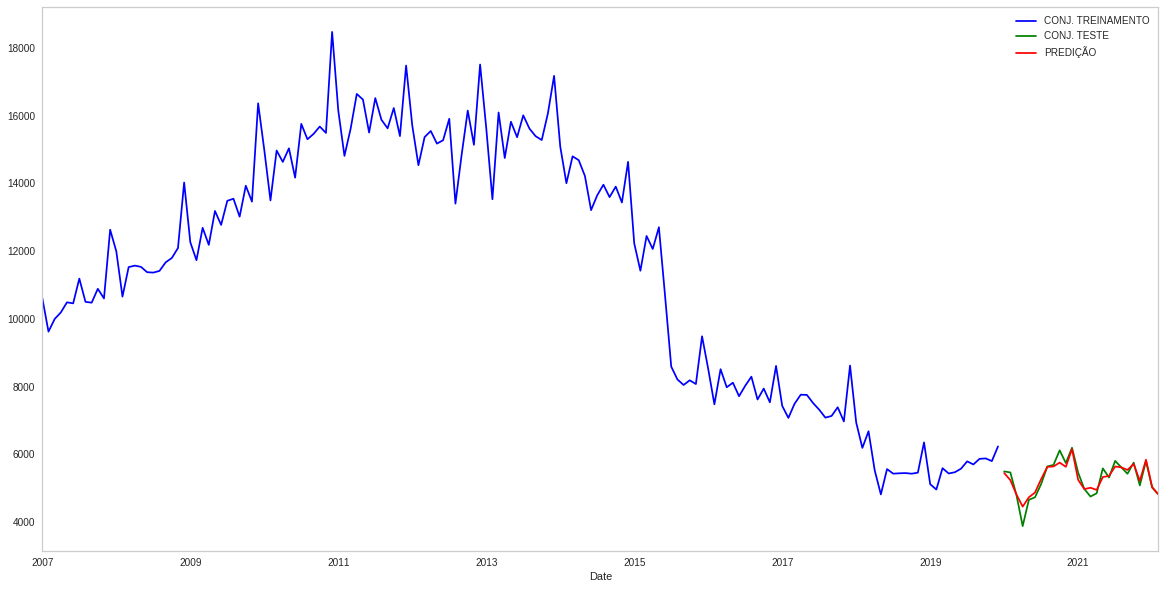

In [39]:
%matplotlib inline
from matplotlib import pyplot

df2022AcidentesM = locals()["dfAcidentes2022"].resample(rule='M').sum()
df2022AcidentesM = df2022AcidentesM.rename(columns={"index": "Date", "data_inversa": "Acidentes"})
df2022AcidentesM

train_data = df2022AcidentesM.loc[:'2019-12-31']
test_data = df2022AcidentesM.loc['2020-01-01':]

train_data["Acidentes"].plot(legend=True,label="CONJ. TREINAMENTO",figsize=(20,10), color='blue', grid=False)
test_data["Acidentes"].plot(legend=True,label="CONJ. TESTE", color='green', grid=False)
predictionsplot["Label"].plot(legend=True,label="PREDIÇÃO", color='red', grid=False)

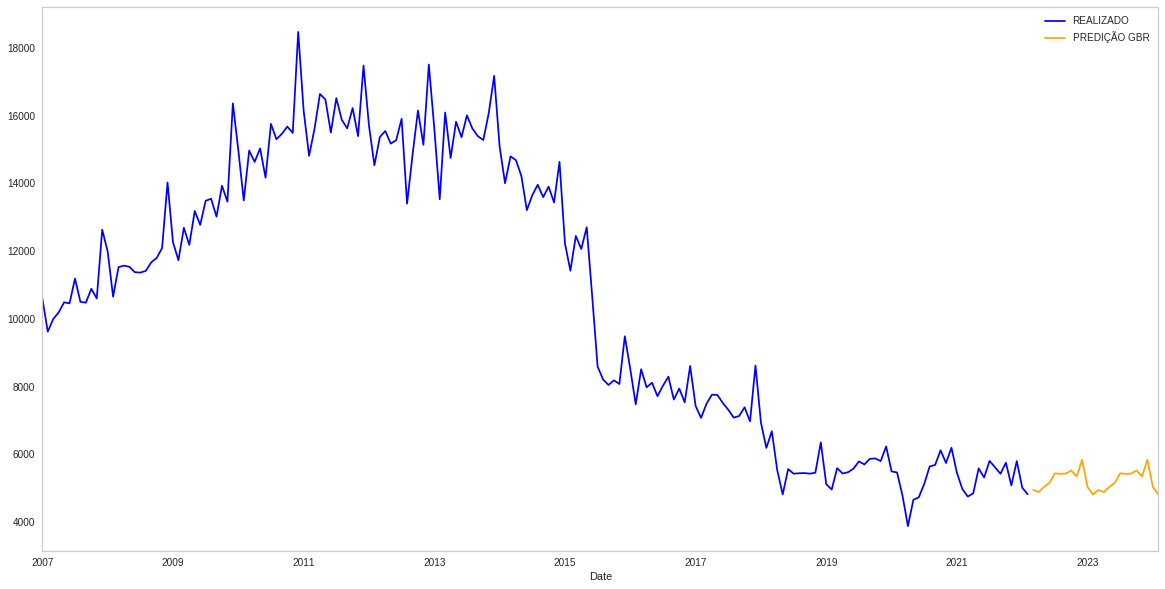

In [40]:
df2022AcidentesM["Acidentes"].plot(legend=True,label="REALIZADO",figsize=(20,10), color='blue', grid=False)
predictions_future["Predição GBR"].plot(legend=True,label="PREDIÇÃO GBR",figsize=(20,10), color='orange', grid=False)

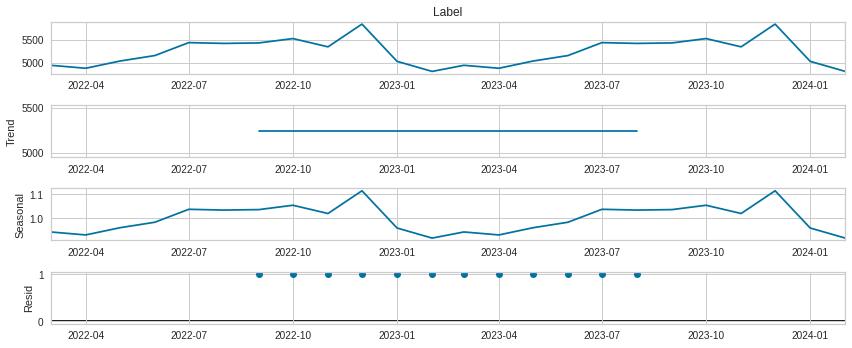

In [ ]:
# Import para visualizar a sazonalidade dos dados
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

result = seasonal_decompose(predictions_future['Label'], model='multiplicative')

from pylab import rcParams
rcParams['figure.figsize'] = 12,5

result.plot();

In [ ]:
modelos = models()

In [ ]:
modelos["Name"]

ID
lr                          Linear Regression
lasso                        Lasso Regression
ridge                        Ridge Regression
en                                Elastic Net
lar                    Least Angle Regression
llar             Lasso Least Angle Regression
omp               Orthogonal Matching Pursuit
br                             Bayesian Ridge
ard         Automatic Relevance Determination
par              Passive Aggressive Regressor
ransac                Random Sample Consensus
tr                         TheilSen Regressor
huber                         Huber Regressor
kr                               Kernel Ridge
svm                 Support Vector Regression
knn                     K Neighbors Regressor
dt                    Decision Tree Regressor
rf                    Random Forest Regressor
et                      Extra Trees Regressor
ada                        AdaBoost Regressor
gbr               Gradient Boosting Regressor
mlp                            